<a href="https://colab.research.google.com/github/weathon/psychology_research/blob/master/Recorded_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://mdpi-res.com/d_attachment/data/data-04-00124/article_deploy/data-04-00124-s001.zip

--2022-05-09 02:44:46--  https://mdpi-res.com/d_attachment/data/data-04-00124/article_deploy/data-04-00124-s001.zip
Resolving mdpi-res.com (mdpi-res.com)... 172.67.68.164, 104.26.14.90, 104.26.15.90, ...
Connecting to mdpi-res.com (mdpi-res.com)|172.67.68.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1134038 (1.1M) [application/zip]
Saving to: ‘data-04-00124-s001.zip’

data-04-00124-s001. 100%[===================>]   1.08M  1.48MB/s    in 0.7s    

2022-05-09 02:44:47 (1.48 MB/s) - ‘data-04-00124-s001.zip’ saved [1134038/1134038]



In [2]:
!mv data-04-00124-s001.zip data.zip
!unzip data.zip

Archive:  data.zip
  inflating: data.csv                
  inflating: Questionnaire1.pdf      
  inflating: Questionnaire2.pdf      


In [3]:
# !pip3 install numpy -U
# !pip install --upgrade scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [4]:
DataFrame = pd.read_csv("data.csv")

In [5]:
Grad = DataFrame[DataFrame["Academic"] == "Grad"]

In [6]:
Under = DataFrame[DataFrame["Academic"] == "Under"]

In [ ]:
np.mean(Grad["ToDep"])

5.285714285714286

In [ ]:
np.mean(Under["ToDep"])

8.433198380566802

In [ ]:
np.std(Grad["ToDep"])

3.587582514635688

In [ ]:
np.std(Under["ToDep"])

4.966547107923175

In [ ]:
scipy.stats.ttest_ind(Grad["ToDep"],Under["ToDep"],equal_var=False)

Ttest_indResult(statistic=-3.6494976679191113, pvalue=0.0011254856725920373)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'Box Plot of Total Depression Score')

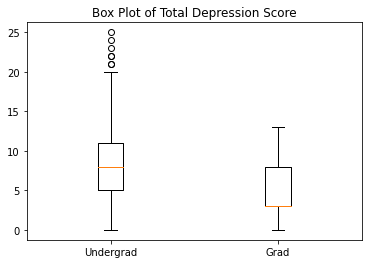

In [ ]:
plt.boxplot([Under["ToDep"],Grad["ToDep"]],labels=["Undergrad","Grad"])
plt.title("Box Plot of Total Depression Score")

In [ ]:
DataFrame.columns

Index(['inter_dom', 'Region', 'Gender', 'Academic', 'Age', 'Age_cate', 'Stay',
       'Stay_Cate', 'Japanese', 'Japanese_cate', 'English', 'English_cate',
       'Intimate', 'Religion', 'Suicide', 'Dep', 'DepType', 'ToDep', 'DepSev',
       'ToSC', 'APD', 'AHome', 'APH', 'Afear', 'ACS', 'AGuilt', 'AMiscell',
       'ToAS', 'Partner', 'Friends', 'Parents', 'Relative', 'Profess',
       ' Phone', 'Doctor', 'Reli', 'Alone', 'Others', 'Internet', 'Partner_bi',
       'Friends_bi', 'Parents_bi', 'Relative_bi', 'Professional_bi',
       'Phone_bi', 'Doctor_bi', 'religion_bi', 'Alone_bi', 'Others_bi',
       'Internet_bi'],
      dtype='object')

In [ ]:
DataFrame["Intimate"]

0      NaN
1      NaN
2      Yes
3       No
4      Yes
      ... 
281    NaN
282    NaN
283    NaN
284    NaN
285    NaN
Name: Intimate, Length: 286, dtype: object

In [ ]:
import math
def isnan(v):
  if type(v) == str: #not strkoukeyahcikun
    return False
  else:
    return math.isnan(v)

In [ ]:
Intimate

nan

In [ ]:
# scipy.stats.ttest_ind(DataFrame[DataFrame["Internet_bi"] == "Yes"]["ToDep"],DataFrame[DataFrame["Internet_bi"] == "No"]["ToDep"],equal_var=1)
scipy.stats.ttest_ind(DataFrame[DataFrame["Internet_bi"] == "Yes"]["ToDep"],DataFrame[DataFrame["Internet_bi"] == "No"]["ToDep"],equal_var=0) #Smaller?

Ttest_indResult(statistic=1.9182171986253846, pvalue=0.05916582875673046)

In [ ]:
print(np.std(DataFrame[DataFrame["Friends_bi"] == "Yes"]["ToDep"]),np.std(DataFrame[DataFrame["Friends_bi"] == "No"]["ToDep"]))

4.457365031870707 5.224251728472603


In [ ]:
print(np.mean(DataFrame[DataFrame["Gender"] == "Male"]["ToDep"]),np.mean(DataFrame[DataFrame["Gender"] == "Female"]["ToDep"]))

7.816326530612245 8.4


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'boxes': [<matplotlib.lines.Line2D at 0x7f2803f6cb90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2803ec0510>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2803e6bc50>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2803e76250>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2804057150>,
  <matplotlib.lines.Line2D at 0x7f2804097290>]}

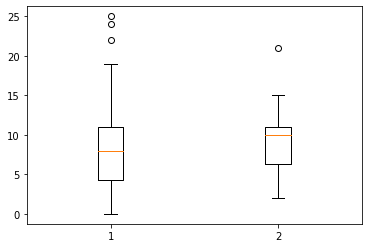

In [ ]:
plt.boxplot([DataFrame[DataFrame["English_cate"] == "High"]["ToDep"],DataFrame[DataFrame["English_cate"] == "Low"]["ToDep"]])

In [ ]:
scipy.stats.ttest_ind(DataFrame[DataFrame["English_cate"] == "High"]["ToAS"],DataFrame[DataFrame["English_cate"] == "Low"]["ToAS"])

Ttest_indResult(statistic=1.3583776554393088, pvalue=0.17598912821951992)

In [ ]:
scipy.stats.ttest_ind(DataFrame[DataFrame["Gender"] == "Male"]["ToAS"],DataFrame[DataFrame["Gender"] == "Female"]["ToAS"],equal_var=0)

Ttest_indResult(statistic=-1.8707914723192378, pvalue=0.06274958281051941)

In [ ]:
DataFrame.Internet_bi.value_counts()

No     223
Yes     45
45       2
223      2
Name: Internet_bi, dtype: int64

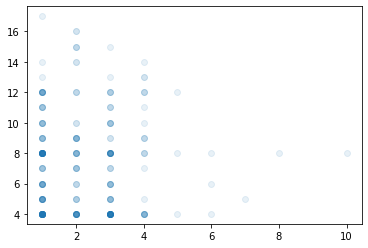

In [ ]:
plt.scatter(DataFrame["Stay"],DataFrame["Afear"],alpha=0.1)

In [8]:
import math

Text(0, 0.5, 'Total PHQ-9')

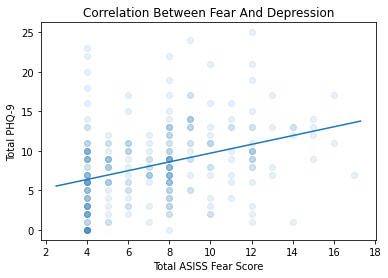

In [13]:
df2 = DataFrame#[DataFrame["Stay"]<=6]
x = np.array([[value for value in df2["Afear"] if not math.isnan(value)]]).reshape(-1,1)
y = [value for value in df2["ToDep"] if not math.isnan(value)]

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x, y)

xs = np.arange(2.5,17.5,0.2)
plt.scatter(x, y,alpha=0.1)
plt.plot(xs, xs*reg.coef_[0]+reg.intercept_)
plt.title("Correlation Between Fear And Depression")
plt.xlabel("Total ASISS Fear Score")
plt.ylabel("Total PHQ-9")

In [14]:
scipy.stats.spearmanr(x,y) #RESULT OF Spearman’s

SpearmanrResult(correlation=0.3907004185267795, pvalue=3.320828877072475e-11)

In [15]:
3.320828877072475e-11*2

6.64165775414495e-11

In [ ]:
reg.coef_

array([-0.29607538])

In [ ]:
np.array(y).shape

(268,)

In [ ]:
ret = scipy.stats.linregress(x.reshape(-1),np.array(y))#ereshape -1 bushi 1 -1 eixnchoahuangberen exinkoukeyahci bieren dianhuaynpi

In [ ]:
ret

LinregressResult(slope=-0.20510417417633964, intercept=8.935044337106195, rvalue=-0.03645150913166049, pvalue=0.5524150412502756, stderr=0.3447699844580074)

In [ ]:
slope,reg.coef_#koukequeshiyiyang

In [ ]:
std_err#yanpi zhege r buyiyang r ^2 yanpi 

NameError: ignored

In [ ]:
DataFrame["Dep"].value_counts()

No     172
Yes     96
96       1
172      1
Name: Dep, dtype: int64

In [ ]:
UnderOberseved = Under["Dep"].value_counts()["Yes"]
GradOberseved = Grad["Dep"].value_counts()["Yes"]
UnderExp = DataFrame["Dep"].value_counts()["Yes"]/len(DataFrame) * len(Under)
GradExp = DataFrame["Dep"].value_counts()["Yes"]/len(DataFrame) * len(Grad)

In [ ]:
print(UnderOberseved,UnderExp)
print(GradOberseved,GradExp)

91 82.9090909090909
5 7.048951048951049


In [ ]:
scipy.stats.chisquare([UnderOberseved, GradOberseved],[UnderExp, GradExp])

Power_divergenceResult(statistic=1.2736769554395033, pvalue=0.2590780172847901)

In [ ]:
scipy.stats.mannwhitneyu(Under["ToDep"],Grad["ToDep"])

MannwhitneyuResult(statistic=1607.5, pvalue=0.0018835062946156987)

In [ ]:
scipy.stats.mannwhitneyu(DataFrame[DataFrame["Intimate"] == "Yes"]["ToDep"],DataFrame[DataFrame["Intimate"] == "No"]["ToDep"]) #huxiyachhizhangkuntt zhege juranmeiyou xianggunaxng??

MannwhitneyuResult(statistic=7560.0, pvalue=0.1874197953619176)

Text(0, 0.5, 'Number of People')

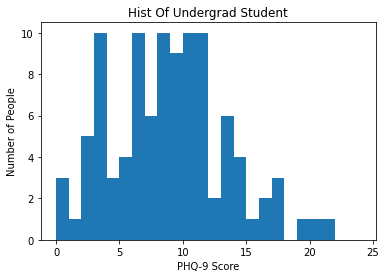

In [ ]:
plt.hist(DataFrame[DataFrame["Intimate"] == "Yes"]["ToDep"],bins=np.arange(0,25))
plt.title("Hist Of Undergrad Student")
plt.xlabel("PHQ-9 Score")
plt.ylabel("Number of People")

Text(0, 0.5, 'Number of People')

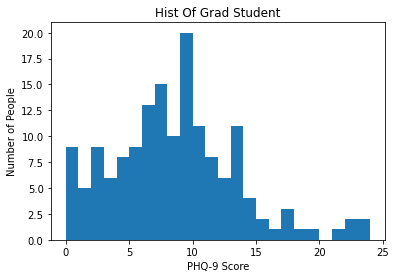

In [ ]:
plt.hist(DataFrame[DataFrame["Intimate"] == "No"]["ToDep"],bins=np.arange(0,25))
plt.title("Hist Of Grad Student")
plt.xlabel("PHQ-9 Score")
plt.ylabel("Number of People")

SpearmanrResult(correlation=0.03215543517949416, pvalue=0.6002213889680279)

In [ ]:
np.version.full_version # scipy evrsion

'1.21.6'

In [ ]:
scipy.version.full_version

'1.7.3'

In [ ]:
InPutNum = ["Japanese","English","Age","Stay"]
InPutCat = ["Intimate","Gender","inter_dom","Religion","Academic"]
# DataFrame[InPutCat]
newData = {}
newData["Intimate"] = DataFrame["Intimate"].replace("Yes",1).replace("No",0).replace(math.nan,-1) #zhegebuhaomakunduzitthl
newData["Gender"] = DataFrame["Gender"].replace("Male",1).replace("Female",0).replace(math.nan,-1)
newData["inter_dom"] = DataFrame["inter_dom"].replace("Inter",1).replace("Dom",0).replace(math.nan,-1)
newData["Religion"] = DataFrame["Religion"].replace("Yes",1).replace("No",0).replace(math.nan,-1)
newData["Academic"] = DataFrame["Academic"].replace("Under",1).replace("Grad",0).replace(math.nan,-1)
newData["Japanese"] = DataFrame["Japanese"].replace(math.nan,-1)
newData["English"] = DataFrame["English"].replace(math.nan,-1)
newData["Age"] = DataFrame["Age"].replace(math.nan,-1)
newData["Stay"] = DataFrame["Stay"].replace(math.nan,-1)

# X = np.array([Japanese,English,Age,Stay,Intimate,Gender,inter_dom,Religion,Academic])
X = np.array(pd.DataFrame(newData))
# X = X.reshape(-1,X.shape[0])
Y = np.array([DataFrame["ToDep"]])
# Y = np.array([DataFrame["Dep"].replace("Yes",1).replace("No",0).replace(math.nan,-1)])

In [ ]:
X[0]

array([3., 4., 4., 2., 1., 3., 3., 1., 4.])

In [ ]:
Y

array([['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
        'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
        'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
        'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
        'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes',
        'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No',
        'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
        'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
        'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes',
        'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes',
        'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No',
        'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No',
        'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
        'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes

In [ ]:
X2 = X[:-18]

In [ ]:
Y2 = Y[:,:-18]

In [ ]:
Y2 = Y2.reshape(-1,1)

In [ ]:
Y2

array([[ 0.,  2.,  2.,  3.,  3.,  6.,  3.,  9.,  7.,  3.,  5.,  8.,  1.,
         3.,  9.,  6.,  3.,  3.,  7.,  1.,  4.,  3., 13.,  1.,  8., 10.,
        13.,  9.,  6.,  7., 10.,  9.,  9.,  2.,  9., 14.,  4., 14., 13.,
        15.,  6.,  4., 10., 12.,  6.,  7., 13.,  2.,  0.,  6., 19.,  9.,
        10.,  8.,  5.,  8., 17., 12.,  8.,  7.,  5.,  2.,  8.,  7.,  5.,
         9., 11.,  9.,  5., 14.,  9.,  5.,  6.,  4.,  2., 10., 11., 10.,
        13.,  6.,  6., 10.,  2.,  0., 13., 13.,  8.,  8.,  2., 13.,  3.,
         4.,  1.,  6., 17., 21., 14.,  4., 12., 10.,  3.,  6.,  9.,  9.,
         7., 25., 19., 11.,  8., 10.,  5., 10.,  2.,  9.,  3., 17.,  6.,
         5.,  0.,  6., 14.,  9.,  9.,  3.,  6.,  0.,  8., 10.,  8.,  3.,
        13.,  1., 13., 11., 14., 14.,  7., 11., 11., 17.,  6.,  9., 10.,
         4., 12.,  0.,  8.,  8., 13.,  5., 10.,  0.,  9.,  5.,  4.,  0.,
         8.,  7., 11., 10.,  7., 11.,  4.,  7.,  9.,  1., 11., 13.,  0.,
        11.,  6.,  7.,  7.,  9., 24.,  6., 11.,  7.

In [ ]:
import tensorflow as tf

import os
import tensorflow_datasets as tfds
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(9),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(30, activation='relu'),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(5, activation='relu'),
  tf.keras.layers.Dense(2, activation='relu'),
  tf.keras.layers.Dense(1),
])
model.summary()
# print(model.output_shape)
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
          # loss='binary_cross_entropy ',metrics=["accuracy"])
          loss='mean_squared_error')#spacekaahzangkunshouhzikkas
#wangjile relu xjiu yachi unjiabusuankunxueya hlon ap tt zuo sigmoid caixiangqilaixueyahengaokoukekun shoulachaojikun unbuzaihuwoyouqidtashiqingkunshouyuenxin zhegenan

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 20)                200       
                                                                 
 dense_106 (Dense)           (None, 30)                630       
                                                                 
 dense_107 (Dense)           (None, 20)                620       
                                                                 
 dense_108 (Dense)           (None, 10)                210       
                                                                 
 dense_109 (Dense)           (None, 5)                 55        
                                                                 
 dense_110 (Dense)           (None, 2)                 12        
                                                                 
 dense_111 (Dense)           (None, 1)               

In [ ]:
model.fit(X2,Y2,epochs=1000,validation_split=0.1)

Epoch 1/1000
8/8 [==============================] - 1s 24ms/step - loss: 93.3994 - val_loss: 82.0122
Epoch 2/1000
8/8 [==============================] - 0s 7ms/step - loss: 90.5718 - val_loss: 80.7864
Epoch 3/1000
8/8 [==============================] - 0s 7ms/step - loss: 89.2852 - val_loss: 79.5781
Epoch 4/1000
8/8 [==============================] - 0s 6ms/step - loss: 88.0386 - val_loss: 78.3776
Epoch 5/1000
8/8 [==============================] - 0s 7ms/step - loss: 86.7833 - val_loss: 77.2126
Epoch 6/1000
8/8 [==============================] - 0s 7ms/step - loss: 85.5733 - val_loss: 76.0549
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 84.3555 - val_loss: 74.9167
Epoch 8/1000
8/8 [==============================] - 0s 7ms/step - loss: 83.1554 - val_loss: 73.7990
Epoch 9/1000
8/8 [==============================] - 0s 6ms/step - loss: 81.9934 - val_loss: 72.6838
Epoch 10/1000
8/8 [==============================] - 0s 6ms/step - loss: 80.8345 - val_loss: 71.582